# Introduction to `Matplotlib` 

It is sometime hard to know where to start with when teaching `matplotlib`.  This is because the library is very large and while easy to use it has a lot of fine tune control of plotting involved.  In this first look at `matplotlib`  I am going to introduce:

* The matplotlib object orientated API
* The components of a plot including figure and axis objects
* How to plot a single variable on a chart
* How to plot multiple variables on a chart and how to skillfully control the legend.
* How to output a high resolution image file.


## The online messy world of `matplotlib`

It is worth understanding that there multiple ways to use `matplotlib`.  This flexibility, in my opinion, has led to a problematic and confusing mix of documentation and examples online.  For our learning purposes, I am going to focus on using the object orientated interface to `matplotlib`.  The abstraction offered via the OOP interface is the most pythonic, cleanest and easiest to follow (again in my opinion).  Once you have a good grasp of the approaches here I suspect you won't look back, but you will also be able to understand the, sometimes messy, examples you find in blogs and documentation online.

## Importing

We'll need both `numpy` and `pandas` for our examples here. We also need to import `matplotlib`. The standard way to import `matplotlib` is

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Example dataset for plotting

We will again use the Covid-19 database from the Netherlands.  As a reminder this contains a time series of deaths, hospital admissions and reported cases.  We will reuse the cleaning code we developed in an earlier section.

>> De Bruin, J, Voorvaart, R, Menger, V, Kocken, I, & Phil, T. (2020). Novel Coronavirus (COVID-19) Cases in The Netherlands (Version v2020.11.17) [Data set]. Zenodo. http://doi.org/10.5281/zenodo.4278891

In [2]:
DATA_URL = 'https://raw.githubusercontent.com/health-data-science-OR/' \
            + 'hpdm139-datasets/main/RIVM_NL_provincial.csv'

In [3]:
def clean_covid_dataset(csv_path):
    '''
    Helper function to clean the netherlands covid dataset
    
    Params:
    -------
    csv_path: str
        Path to Dutch Covid CSV file
        
    Returns:
    -------
    pd.Dataframe
        Cleaned covid dataset in wide format
    '''    
    
    translated_names = {'Datum':'date', 
                        'Provincienaam':'province', 
                        'Provinciecode':'province_code', 
                        'Type':'metric', 
                        'Aantal':'n', 
                        'AantalCumulatief':'n_cum'}

    translated_metrics = {'metric': {'Overleden':'deaths',
                                     'Totaal':'total_cases',
                                     'Ziekenhuisopname':'hosp_admit'}}
    
    # method chaining solution.  Can be more readable
    df = (pd.read_csv(csv_path)
            .rename(columns=translated_names)
            .replace(translated_metrics)
            .fillna(value={'n': 0, 'n_cum': 0, 'province': 'overall'})
            .astype({'n': np.int32, 'n_cum': np.int32})
            .assign(date=lambda x: pd.to_datetime(x['date']),
                    metric=lambda x: pd.Categorical(x['metric']))
            .drop(['province_code'], axis=1)
            .pivot_table(columns=['metric'], 
                         index=['province','date'])
    )
        
    return df

In [4]:
neth_covid = clean_covid_dataset(DATA_URL)

## A simple plotting example

Let's create a plot of positive cases reported in the Netherlands.  The first thing we need to do is create a `Figure` object.  The constructor takes a number of parameters, but for our purposes the most useful on is `figsize` which sizes the plots using a 2d tuple.

```python
# create an instance of matplotlib.figure.Figure
fig = plt.figure(figsize=(12,3))
```

Now we have a figure we can create an `AxesSubplot` object.  This has lots of useful methods attached to it that all us to visualise datasets and customise the plot.  We create an axes object by calling a method from the `Figure` object.

```python
# create an AxesSubplot
ax = fig.add_subplot()
```

You now have a figure `fig` and an axis subplot `ax`.  Try to get into the habbit of creating your plots this way.  These objects will come in very handy!  Put these two lines of code together and you get a blank plot.

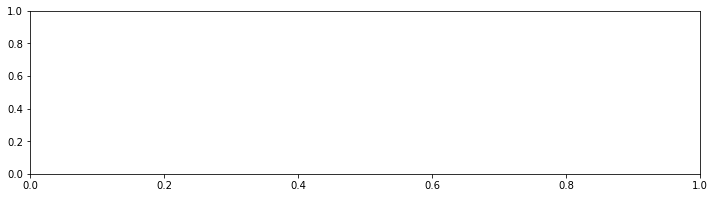

In [5]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot()

Let's assume we have the following dataset:
```python
dataset = [1, 2, 1, 2, 1]
```
To plot this data we can intuitively call the `plot` method of `ax` like so:

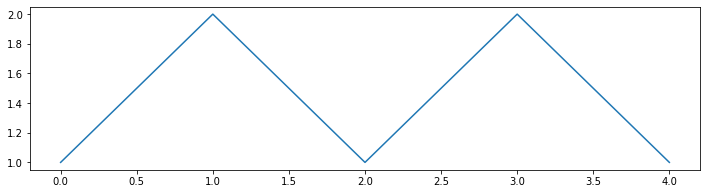

In [6]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot()
dataset = [1, 2, 1, 2, 1]

# plot in this case returns a 2D line plot object
line_plot = ax.plot(dataset)

The good news is that there is no real difference between plotting our simple data and a proper health data set.  For example to plot positive cases in `Groningen`:

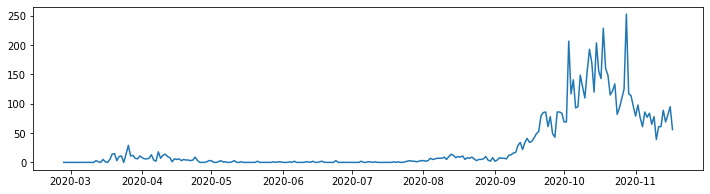

In [7]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot()

# using indexing to select gronigen and the daily number of cases
line_plot = ax.plot(neth_covid.loc['Groningen']['n']['total_cases'])

It is bad practice to exclude axis labels.  In true pythonic style setting the x and y labels is a simple operation.  We simply add the following code to our listing:

```python
# set x axis label
ax.set_xlabel("Date")

# set y axis label
ax.set_ylabel("Positive cases")
```

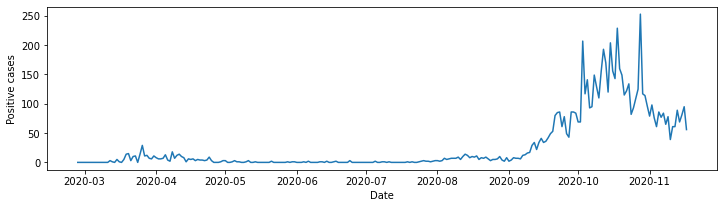

In [8]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot()
ax.set_xlabel("Date")
ax.set_ylabel("Positive cases")
line_plot = ax.plot(neth_covid.loc['Groningen']['n']['total_cases'])

### Helping the reader

Let's make a few final tweaks to our plot to help readability.

* Increase the font size of axis labels and ticks to 12
* Add in x, y grid lines 
* Increase the line width of the plot

Increasing the font size of the x and y axis labels requires us to add a `fontsize` parameter when they are set.  For example,

```python
ax.set_xlabel("Date", fontsize=12)
```

The command is a little less obvious for the tick labels themselves (tick labels are the values on the axis). We need to use a seperate method called `tick_params`.  To set both tick label sizes to 12 we use:

```python
ax.tick_params(axis='both', labelsize=12)
```

There might be instances where you only need to set the tick label size on one axis.  For example, to set only for the x or y axis use:

```python
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
```

As this is quite a long plot its useful to add grid lines to the help a reader.  We can do this by calling the axis grid method

```python
ax.grid()
```

By default that will provide solid black grid lines.  We can vary the style by passing parameters to the command.  For example, to change the line style to '--' we can 

```python
ax.grid(linestyle='--')
```

We will also increase the line width using the `lw` parameter of the `.plot()` method.  You might need to experiment with different widths in practice.  Here's an example:

```python
line_plot = ax.plot(neth_covid.loc['Groningen']['n']['total_cases'], lw=2.0)
```

The full modified code listing is below.

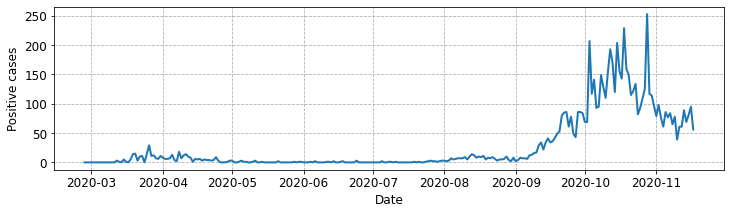

In [9]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot()

# add in fontsize parameter
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Positive cases", fontsize=12)

# include x, y grid 
ax.grid(linestyle='--')

# set size of x, y ticks
ax.tick_params(axis='both', labelsize=12)

# add `lw=2.0` to increase line width (default = ~1.5)
line_plot = ax.plot(neth_covid.loc['Groningen']['n']['total_cases'], lw=2.0)

## Plotting multiple variables and using legends.

Let's modify our plot above so we can explore multiple provinces at the same time.  I've chosen a stacked line.  We will put the plotting code in a function called `plot_stacked_cases`.  We can pass the subgroups we wish to explore, their labels (that we will include in a legend) and the y axis label.

> We include a stacked plot by calling the method `ax.stackplot()`

We will first plot 'Groningen', 'Utrecht', 'Gelderland', and 'Drenthe'.  To understand the plot we will need to include a **legend**.  `Matplotlib` can help with positioning the legend, but we can also fine tune its position, fontsize and number of columns.

The basic command to include a legend is:

```python
ax.legend()

# equivalent to ...
ax.legend(loc='best')
```

By default `matplotlib` chooses the so called best position for the legends location. Let's test that out to see how it looks.

In [10]:
def plot_stacked_cases(sub_groups, labels, y_label, leg_loc='best', n_cols=1):
    fig = plt.figure(figsize=(12,3))
    ax = fig.add_subplot()
    
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)

    # include x, y grid 
    ax.grid(ls='--')

    # set size of x, y ticks
    ax.tick_params(axis='both', labelsize=12)

    # create stacked plot
    stk_plt = ax.stackplot(sub_groups[0].index, sub_groups, labels=labels)

    # add legend - matplotlib decides placement
    ax.legend(loc=leg_loc, ncol=n_cols)
            
    return fig, ax

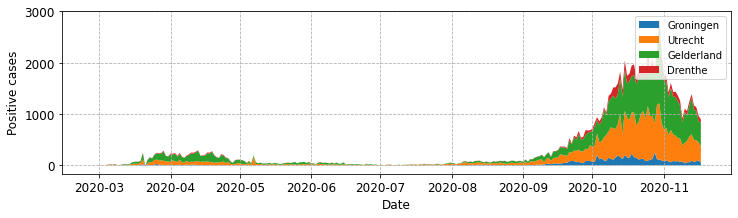

In [11]:
# select the analysis sub group and store in list. (exclude overall)
provinces = ['Groningen', 'Utrecht', 'Gelderland', 'Drenthe']
subgroups = [neth_covid.loc[p]['n']['total_cases'] for p in provinces]   

fig, ax = plot_stacked_cases(subgroups, provinces, "Positive cases")

For simple plots you should hopefully find 'best' works well, but in our case, with four series, its end ups not being ideally positioned.  The first thing we can tweak is its position using the `loc` parameter

```python
# include after a call to .plot()
ax.legend(loc='upper left')
```
There are multiple values you might try (default is `best` or`0`).

| Location String | Location Code |
|:---------------:|:-------------:|
| 'best'          | 0             |
| 'upper right'   | 1             |
| 'upper left'    | 2             |
| 'lower left'    | 3             |
| 'lower right'   | 4             |
| 'right'         | 5             |
| 'center left'   | 6             |
| 'center right'  | 7             |
| 'lower center'  | 8             |
| 'upper center'  | 9             |
| 'center'        | 10            |

It is usual to try out a few of these options when deciding on how to present a figure. 

 

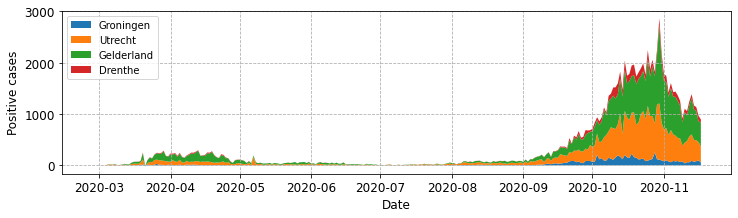

In [12]:
# select the analysis sub group and store in list. (exclude overall)
provinces = ['Groningen', 'Utrecht', 'Gelderland', 'Drenthe']
subgroups = [neth_covid.loc[p]['n']['total_cases'] for p in provinces]   

fig, ax = plot_stacked_cases(subgroups, provinces, "Positive cases", 
                             leg_loc='upper left')

By default the legend is presented as a single column.  We can increase the number of columns by setting the `ncol` parameter.  For example to set this to 4 and locate the legend upper centre:

```python
ax.legend(loc='upper left', ncol=4)
```

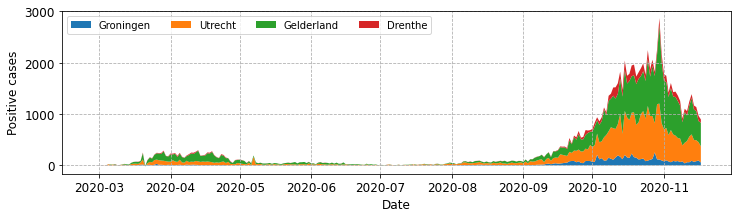

In [13]:
# select the analysis sub group and store in list. (exclude overall)
provinces = ['Groningen', 'Utrecht', 'Gelderland', 'Drenthe']
subgroups = [neth_covid.loc[p]['n']['total_cases'] for p in provinces]   

fig, ax = plot_stacked_cases(subgroups, provinces, "Positive cases", 
                             leg_loc='upper left', n_cols=4)

Note that we have called the legend method of the `ax` object.  I've found this to be the simplest approachin practice, but sometimes I need to position the legend outside of the central plotting area.  To do this you can call the the method from the `fig` object.

```python
fig.legend(loc='upper center', ncol=4)
```
Using the code above you should find that the the legend appears above the plotting area in the figure.  This might sense if you needed to include a higher number of subgroups, for example all of the provinces in a single plot.

Let's first look at what the plot looks like with our original implementation.

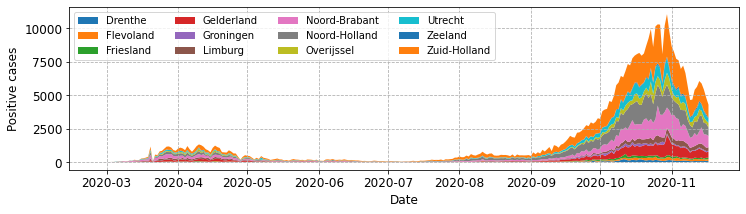

In [14]:
# drop the index and get the unique provinces.
provinces = neth_covid.reset_index()['province'].unique().tolist()

# get all subgroups and exclude overall.
subgroups = [neth_covid.loc[p]['n']['total_cases'] for p in provinces 
             if p != 'overall']   

fig, ax = plot_stacked_cases(subgroups, provinces, "Positive cases", 
                             leg_loc='upper left', n_cols=4)

That works okay, but its not ideal that the central plotting area contains a very large legend.  Now let's modify `plot_stacked_cases` to call `fig.legend()`.

In [15]:
def plot_stacked_cases(sub_groups, labels, y_label, leg_loc='best', n_cols=1):
    fig = plt.figure(figsize=(12,3))
    ax = fig.add_subplot()
    
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)

    # include x, y grid 
    ax.grid(ls='--')

    # set size of x, y ticks
    ax.tick_params(axis='both', labelsize=12)

    # create stacked plot
    stk_plt = ax.stackplot(sub_groups[0].index, sub_groups, labels=labels)

    # add legend - matplotlib decides placement
    fig.legend(loc=leg_loc, ncol=n_cols)
            
    return fig, ax

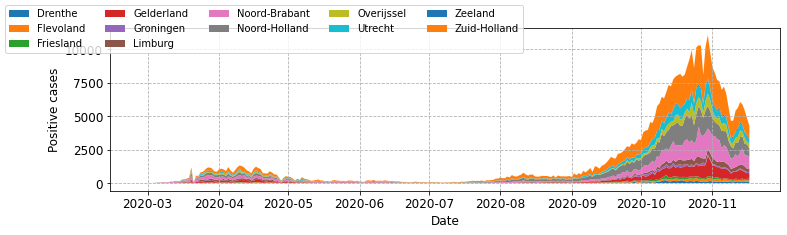

In [16]:
# drop the index and get the unique provinces.
provinces = neth_covid.reset_index()['province'].unique().tolist()

# get all subgroups and exclude overall.
subgroups = [neth_covid.loc[p]['n']['total_cases'] for p in provinces 
             if p != 'overall']   

fig, ax = plot_stacked_cases(subgroups, provinces, "Positive cases", 
                             leg_loc='upper left', n_cols=5)

Using the code above, try a few different location parameters.  In most cases the legend ends up overlapping part of an axis or the plot line.  **That is quite frustrating!**  A further level of fine tuning is needed.  To do this we can employ the `bbox_to_anchor` parameter.  This takes a tuple of the form `(x, y)` or `(x, y, width, height)`.  To begin with I'd recommend just using the `(x, y)` approach; when calling from `fig` `x` and `y` are figure coordinate positions.  The value `(0.5, 0.5)` **places the corner specified by `loc`** of in the centre of the plot.  For example,

```python
    # add legend.  Upper left corner at centre of figure.
    fig.legend(loc='upper left', bbox_to_anchor=(0.5, 0.5)
               
    # add legend.  lower centre corner at centre of figure.
    fig.legend(loc='lower centre', bbox_to_anchor=(0.5, 0.5)
               
    # add legend.  lower centre corner at left centre of figure.
    fig.legend(loc='lower centre', bbox_to_anchor=(0.0, 0.5)
```


> In general, I think you will need to do a bit of trial and error to get the positioning just as you want it. This should also help you understand how the `bbox_to_anchor` and `loc` parameters work together. Its worth knowing that (1.0, 1.0) is the top right of the figure, and (0.0, 0.0) is bottom left.  You can of course go above and below these values.

Here's a final version of `plot_stacked_cases` that let's you control `bbox_to_anchor` and some code that places a legend outside the main plotting area.  Try a few parameter combinations to build an understanding of how it works.

In [17]:
def plot_stacked_cases(sub_groups, labels, y_label, leg_loc='best', n_cols=1,
                       bbox_to_anchor=(0.5, 0.5)):
    
    fig = plt.figure(figsize=(12,3))
    ax = fig.add_subplot()
    
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)

    # include x, y grid 
    ax.grid(ls='--')

    # set size of x, y ticks
    ax.tick_params(axis='both', labelsize=12)

    # create stacked plot
    stk_plt = ax.stackplot(sub_groups[0].index, sub_groups, labels=labels)

    # add legend
    fig.legend(loc=leg_loc, ncol=n_cols, bbox_to_anchor=bbox_to_anchor)
            
    return fig, ax

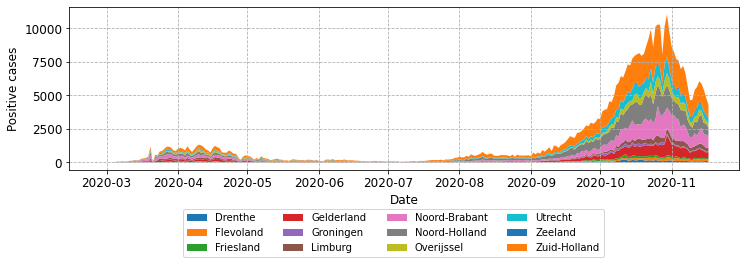

In [18]:
fig, ax = plot_stacked_cases(subgroups, provinces, "Positive cases", 
                             leg_loc='lower center', bbox_to_anchor=(0.5, -0.3),
                             n_cols=4)

## Saving a high quality image

If you are working outside of a Jupyter notebook, for example, for a publication or report, then you will need to save your chart as a high resolution image.  This is achieved with the `.savefig()` method of the `fig` object. I recommend that you make use of the `dpi` or dots per inch parameter (e.g. set to 300 for a academic publication) and set `bbox_inches='tight'` which removes the padding around the image.

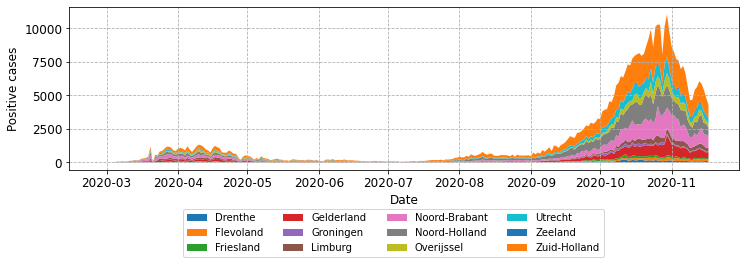

In [19]:
fig, ax = plot_stacked_cases(subgroups, provinces, "Positive cases", 
                             leg_loc='lower center', bbox_to_anchor=(0.5, -0.3),
                             n_cols=4)

fig.savefig('stacked.png', dpi=300, bbox_inches='tight')

## You have learnt useful things here!

You may not realise it from our simple example, but you have learnt a lot about `matplotlib`.  You now have some code that can be reused to create and manipulate a large number of plots. Yes, there are many types of different plots you can create and they are not covered here.  For help with those I recommend you check out the `matplotlib` official documentation and its example [gallary](https://matplotlib.org/stable/gallery/index.html)